# Support Vector Machines (SVM)

These are a useful piece of mathematical/computational technology that are capable of carrying out linear and non-linear classification, regression and outlier detection

It uses an idea or principle called "large margin separation"

The idea is to find the widest boundary "lane" or "street" between the two or more groups of specimens

The edges of the street are said to be "supported" by the instance of specimens on the sides of the street, these specimens are observations are said to support the boundary.

See

Chapter 5 of "Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow, 2nd edition" by Geron

Updated 1/18/2023



## Hard Margins and Soft Margins

In a hard margin system,   the specimens of the two or more classes must lie entirely outside the boundaries of the "lane".

In a soft margin system, points are allowed to lie within the lane or on the wrong side.  The choice of lane location and width then needs to be optimized to minimize
but not eliminate lane violations.   Systems with low margin (lane) violations on the test data may be overfitting and may not generalize well.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt

This example uses the Iris data set, working with only two variables and a binary classification as I. virginica or not

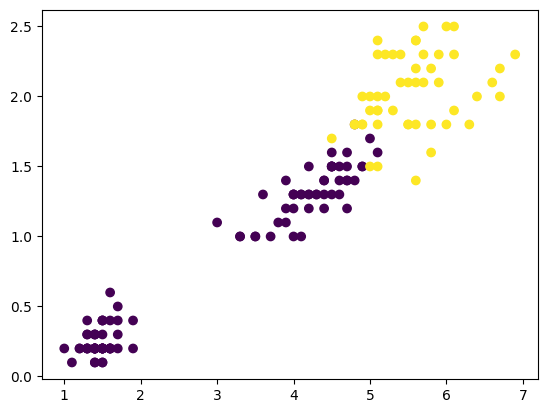

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

plt.scatter(X[:,0],X[:,1],c=y)

### Standard Scaling

Since SVM is looking for "lanes" to separate specimens,   we really need to have all the variables on the same scale.

It is wise,  well more or less required, to use Standard Scaling,  it is pipelined here

The SVC method does alway require that the data all be centered, the mean of each variable must be zero, no option on that one.

In [3]:
# here is the pipleline made of a standard scaling and a linear SVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
y_pred= svm_clf.predict(X)
print( sum(y==y_pred)/y_pred.shape[0])

0.96


### Visualization, using the methods from "Decision Boundaries for categorizers"

<ipython-input-5-cd0ff7016cca>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


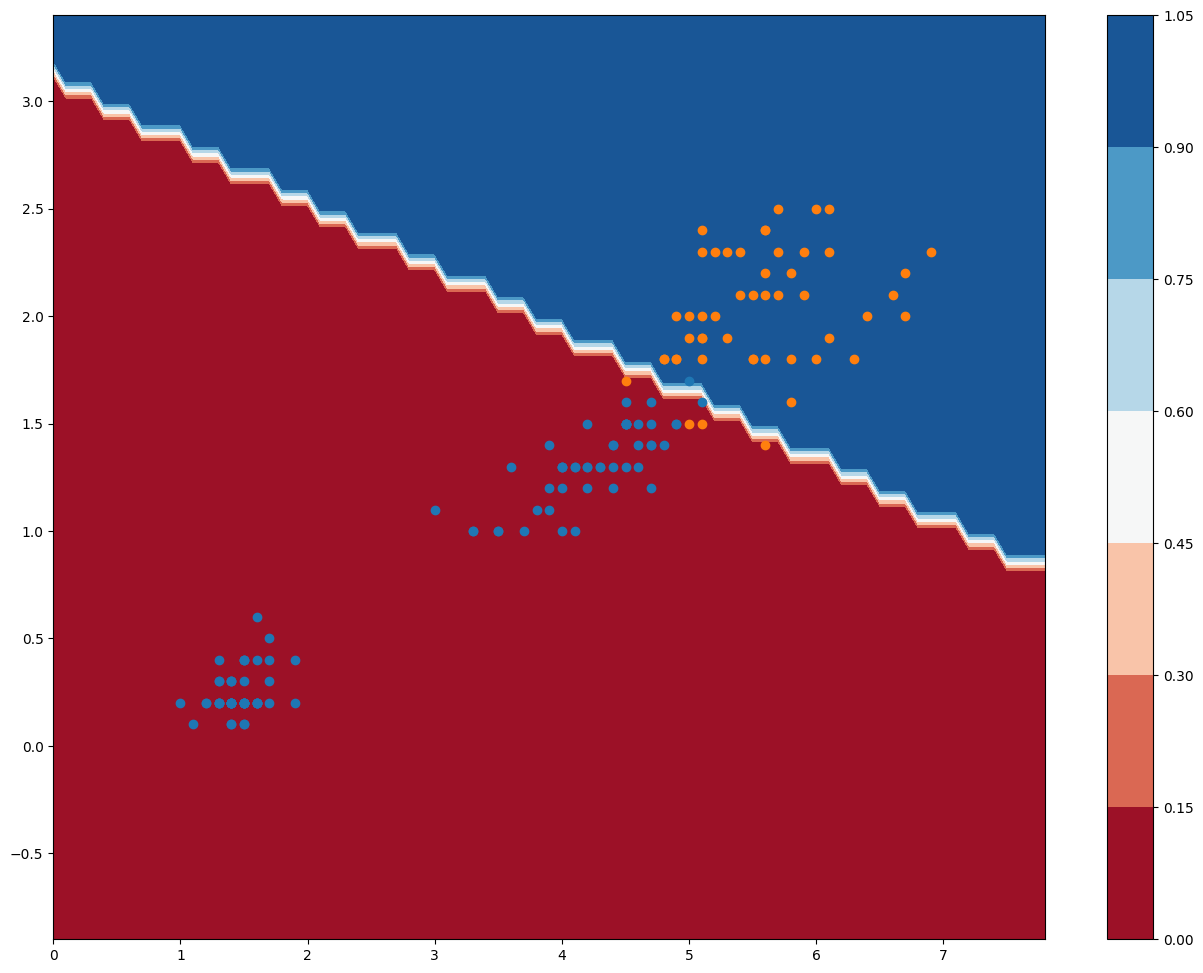

In [5]:
from matplotlib.pyplot import figure

X1=X[:,0]
X2=X[:,1]
# define bounds of the domain
min1, max1 = X1.min()-1,  X1.max()+1
min2, max2 = X2.min()-1, X2.max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid,  using probabilities this time
yhat = svm_clf.predict(grid)
# keep just the probabilities for class 0
#yhat = yhat[:, 0]

figure(figsize=(16, 12))


# reshape the predictions back into a grid
zz2 = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz2, cmap='RdBu')
#plt.contour(xx, yy, zz2, levels=14, linewidths=0.2, colors='k')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')




# Another example, from Scikit learn

Using the "blobs" generated data sets

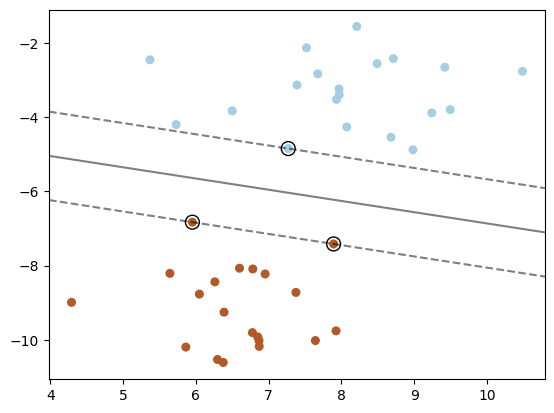

In [6]:
from sklearn.datasets import make_blobs
from sklearn import svm

# we create 40 separable points, using blobs as the generator

X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
# notice that we can get the support vectors from the SVC fitted model, these are the points along the edge of the line that support the lane
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## Nonlinear SVM

sometimes, adding polynomial terms in the predictors increases our ability to classify with an SVM

There is an automated tool, Polynomial features that will add powers of the predictors to the data

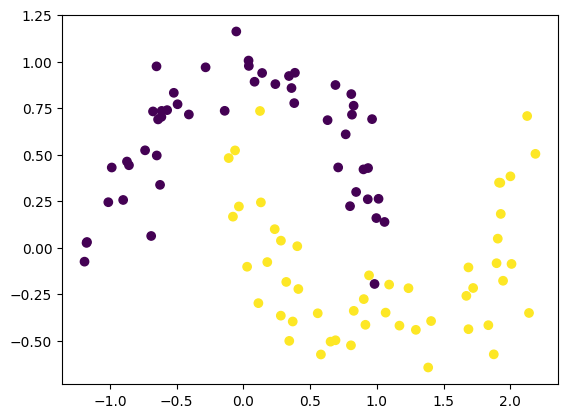

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# this is the moons data set, meant to be hard for classifiers

X, y = make_moons(n_samples=100, noise=0.15)


plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
#generate some powers of the two x terms, so we have more flexibility in constructing the boundary

PF_trans=PolynomialFeatures(degree=3)

XP=PF_trans.fit_transform(X)
XP[0:2,:]

# note, the lead value is a constant, 1 in this case

#we are getting [1, x1,x2, x1^2,x2^2, x1x2, x1^3, x2^3,x1^2x2, x1x2^2]


array([[ 1.        , -0.73675816,  0.52292329,  0.54281258, -0.385268  ,
         0.27344876, -0.3999216 ,  0.28384934, -0.20146561,  0.14299273],
       [ 1.        ,  2.13935707, -0.35098297,  4.57684869, -0.7508779 ,
         0.12318904,  9.79151361, -1.60639594,  0.26354535, -0.04323726]])

In [9]:
# we need to scale these

XP=StandardScaler().fit_transform(XP)
XP[0:2,:]

array([[ 0.        , -1.39007316,  0.61174239, -0.40776492, -0.78992204,
        -0.04289868, -0.64594387,  0.36305406, -1.18189694, -0.08563214],
       [ 0.        ,  1.81609762, -1.19109347,  2.74214843, -1.6653939 ,
        -0.54746751,  3.04293278, -2.58390344,  0.77488185, -0.66715609]])

In [10]:
my_LSVC=LinearSVC(C=10, loss="hinge",max_iter=3000)

my_LSVC.fit(XP,y)

y_pred=my_LSVC.predict(XP)

print(sum(y_pred==y)/y.shape[0])

0.98


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# here is a piplined version

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=3000))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=3000))])

<ipython-input-25-a97894b97c7c>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


Text(0.5, 1.0, 'Decision Boundary of SVM with non-linear predictors')

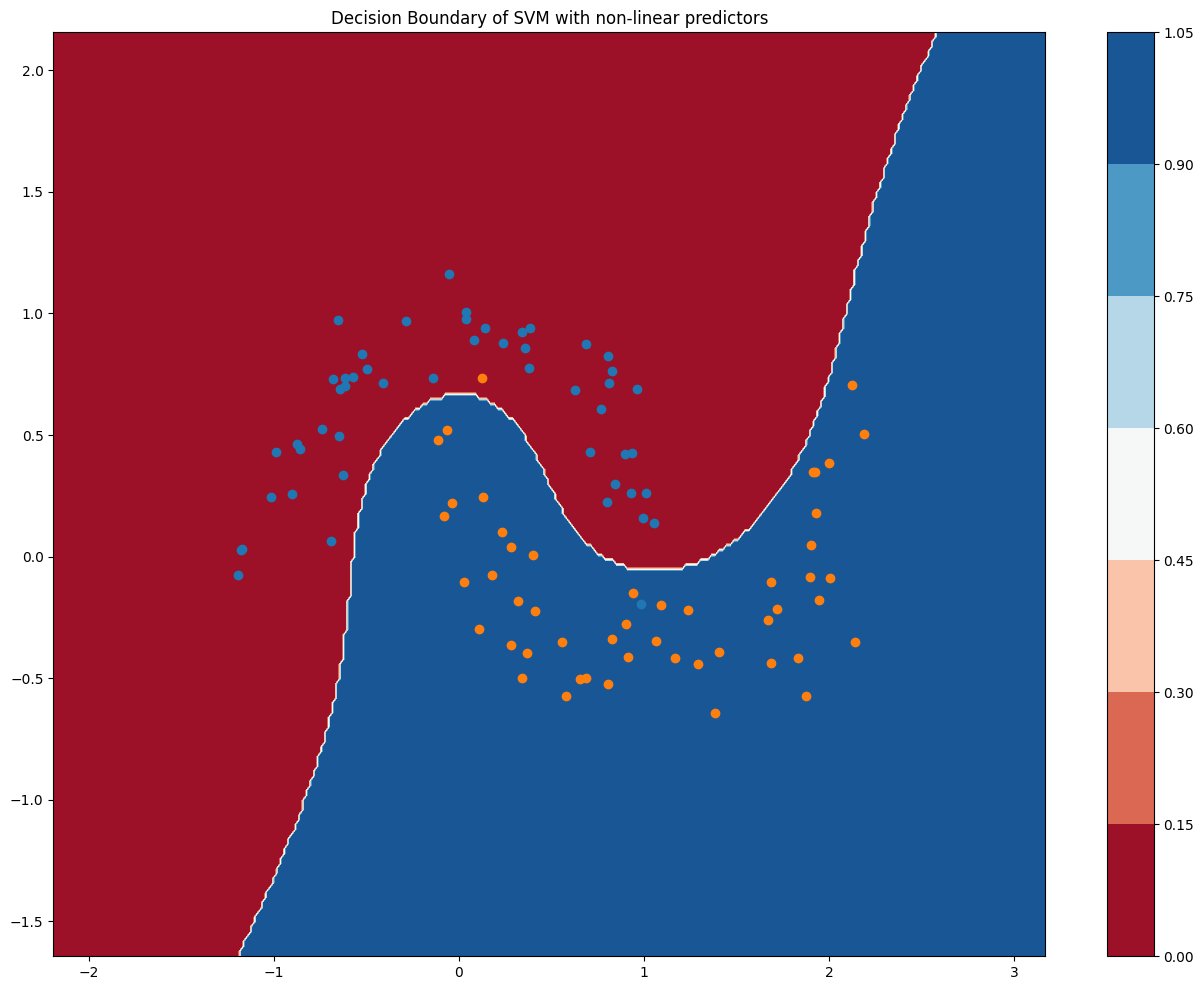

In [25]:
X1=X[:,0]
X2=X[:,1]
# define bounds of the domain
min1, max1 = X1.min()-1,  X1.max()+1
min2, max2 = X2.min()-1, X2.max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.02)
x2grid = np.arange(min2, max2, 0.02)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid,  using probabilities this time
yhat = polynomial_svm_clf.predict(grid)
# keep just the probabilities for class 0
#yhat = yhat[:, 0]

figure(figsize=(16, 12))


# reshape the predictions back into a grid
zz2 = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz2, cmap='RdBu')
#plt.contour(xx, yy, zz2, levels=14, linewidths=0.2, colors='k')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

plt.title("Decision Boundary of SVM with non-linear predictors")

### Question/Action

try running this SVM with different levels of polynomials included, try 1,2,3,4 and see what happens

- Lower degrees seems to underfit the model
- Higher degrees seemed to overfit

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-20-1b2f12c33866>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


Text(0.5, 1.0, 'Decision Boundary of SVM with non-linear predictors')

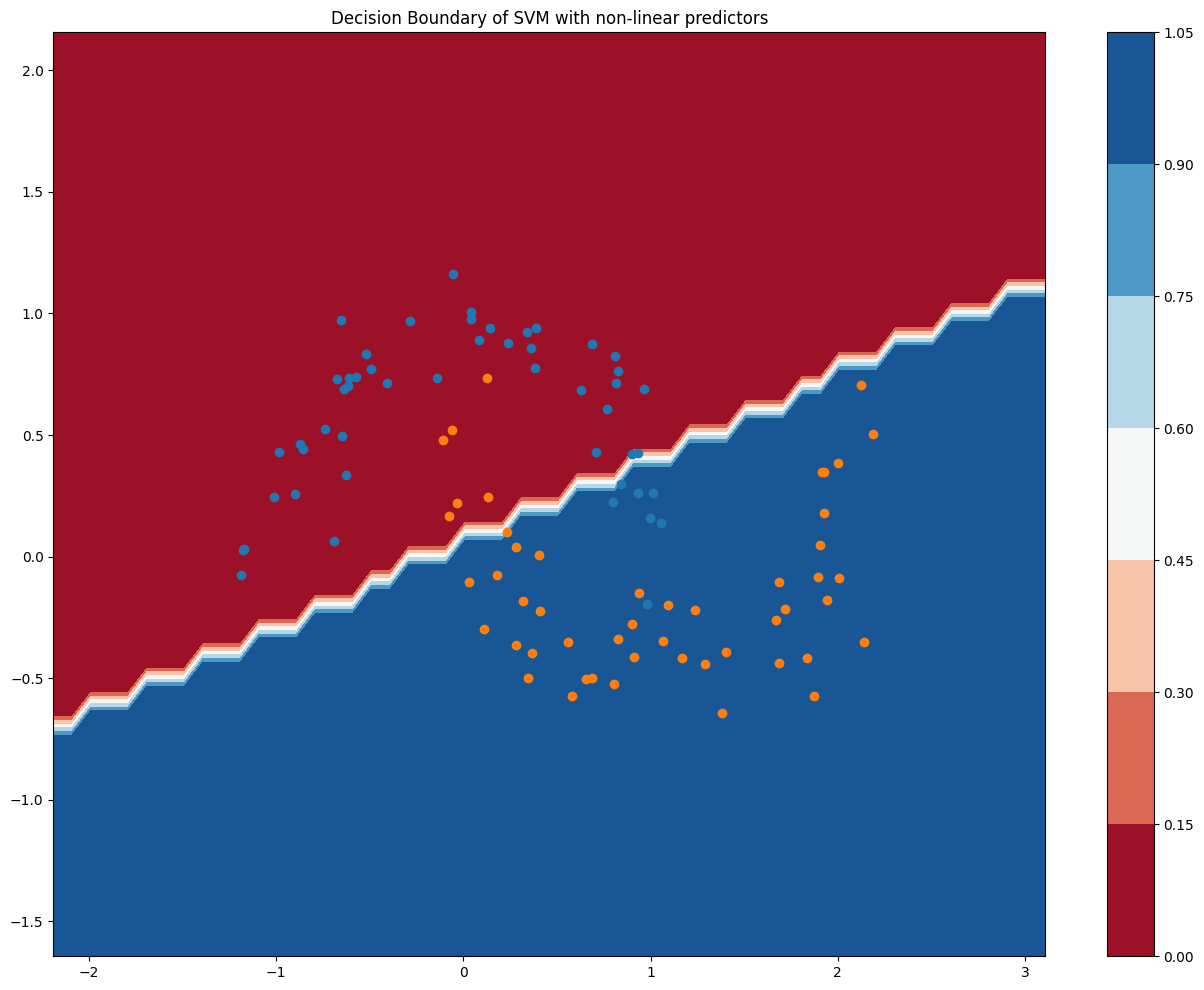

In [20]:

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=3000))
    ])

polynomial_svm_clf.fit(X, y)

X1=X[:,0]
X2=X[:,1]
# define bounds of the domain
min1, max1 = X1.min()-1,  X1.max()+1
min2, max2 = X2.min()-1, X2.max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid,  using probabilities this time
yhat = polynomial_svm_clf.predict(grid)
# keep just the probabilities for class 0
#yhat = yhat[:, 0]

figure(figsize=(16, 12))


# reshape the predictions back into a grid
zz2 = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz2, cmap='RdBu')
#plt.contour(xx, yy, zz2, levels=14, linewidths=0.2, colors='k')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

plt.title("Decision Boundary of SVM with non-linear predictors")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-22-7aa91de35d60>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


Text(0.5, 1.0, 'Decision Boundary of SVM with non-linear predictors')

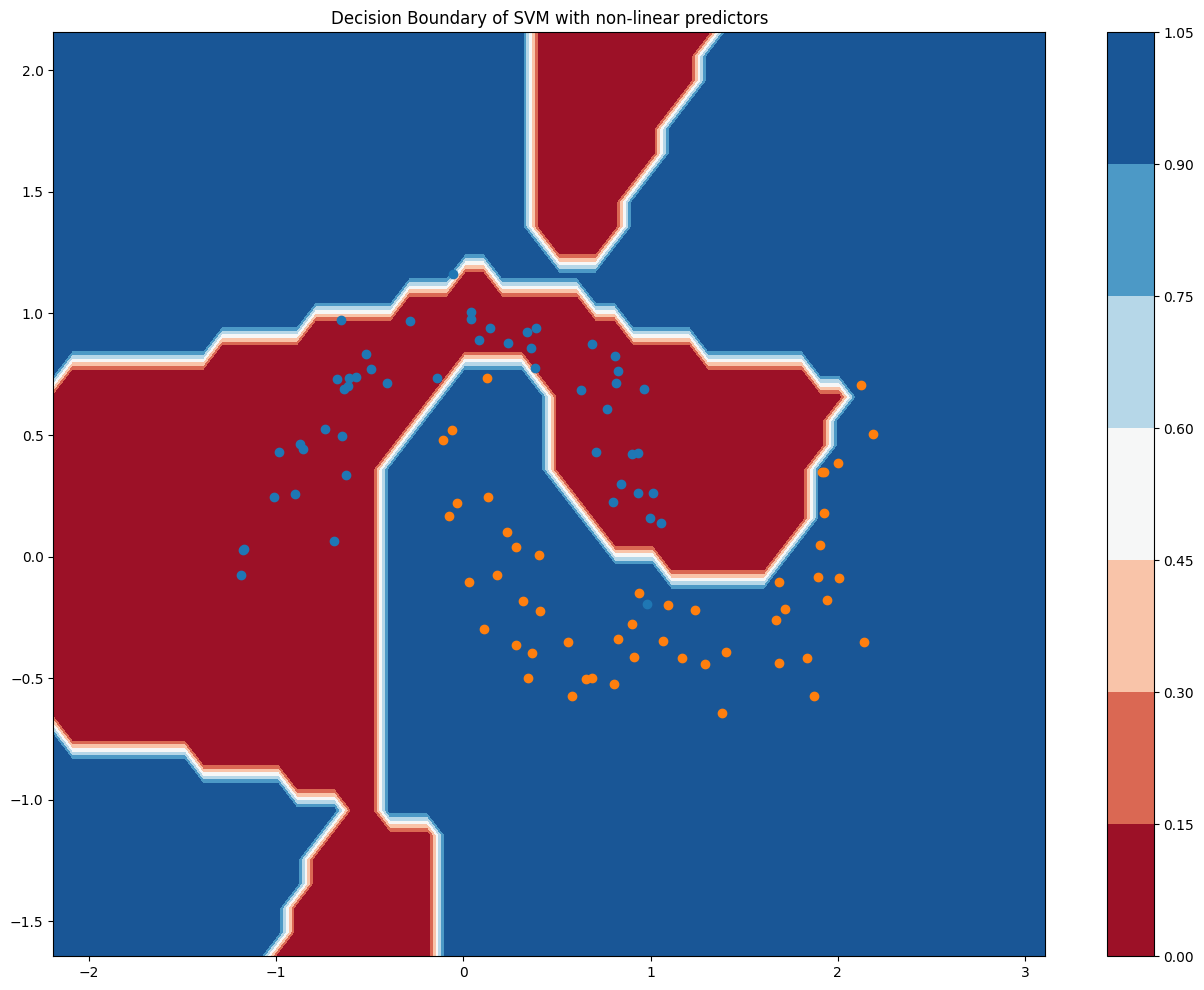

In [22]:

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=100)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=3000))
    ])

polynomial_svm_clf.fit(X, y)

X1=X[:,0]
X2=X[:,1]
# define bounds of the domain
min1, max1 = X1.min()-1,  X1.max()+1
min2, max2 = X2.min()-1, X2.max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid,  using probabilities this time
yhat = polynomial_svm_clf.predict(grid)
# keep just the probabilities for class 0
#yhat = yhat[:, 0]

figure(figsize=(16, 12))


# reshape the predictions back into a grid
zz2 = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz2, cmap='RdBu')
#plt.contour(xx, yy, zz2, levels=14, linewidths=0.2, colors='k')
# add a legend, called a color bar
plt.colorbar(c)


# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

plt.title("Decision Boundary of SVM with non-linear predictors")

## The kernel trick



In [26]:
from sklearn.svm import SVC

# still using the moon data

# this is using a 3 degree polynomial kernel

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [27]:
y_pred=poly_kernel_svm_clf.predict(X)

print(sum(y_pred==y)/y.shape[0])

0.98


In [15]:
### Making a function to plot these boundaries

In [28]:
def show_clf_boundaries(X1,X2,model_in):
    # define bounds of the domain
    min1, max1 = X1.min()-1,  X1.max()+1
    min2, max2 = X2.min()-1, X2.max()+1

    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)

    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    # make predictions for the grid,  using probabilities this time
    yhat = model_in.predict(grid)
    # keep just the probabilities for class 0
    #yhat = yhat[:, 0]

    figure(figsize=(16, 12))


    # reshape the predictions back into a grid
    zz2 = yhat.reshape(xx.shape)

    # plot the grid of x, y and z values as a surface
    c = plt.contourf(xx, yy, zz2, cmap='RdBu')
    #plt.contour(xx, yy, zz2, levels=14, linewidths=0.2, colors='k')
    # add a legend, called a color bar
    plt.colorbar(c)


    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

<ipython-input-28-16bc9550f15d>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


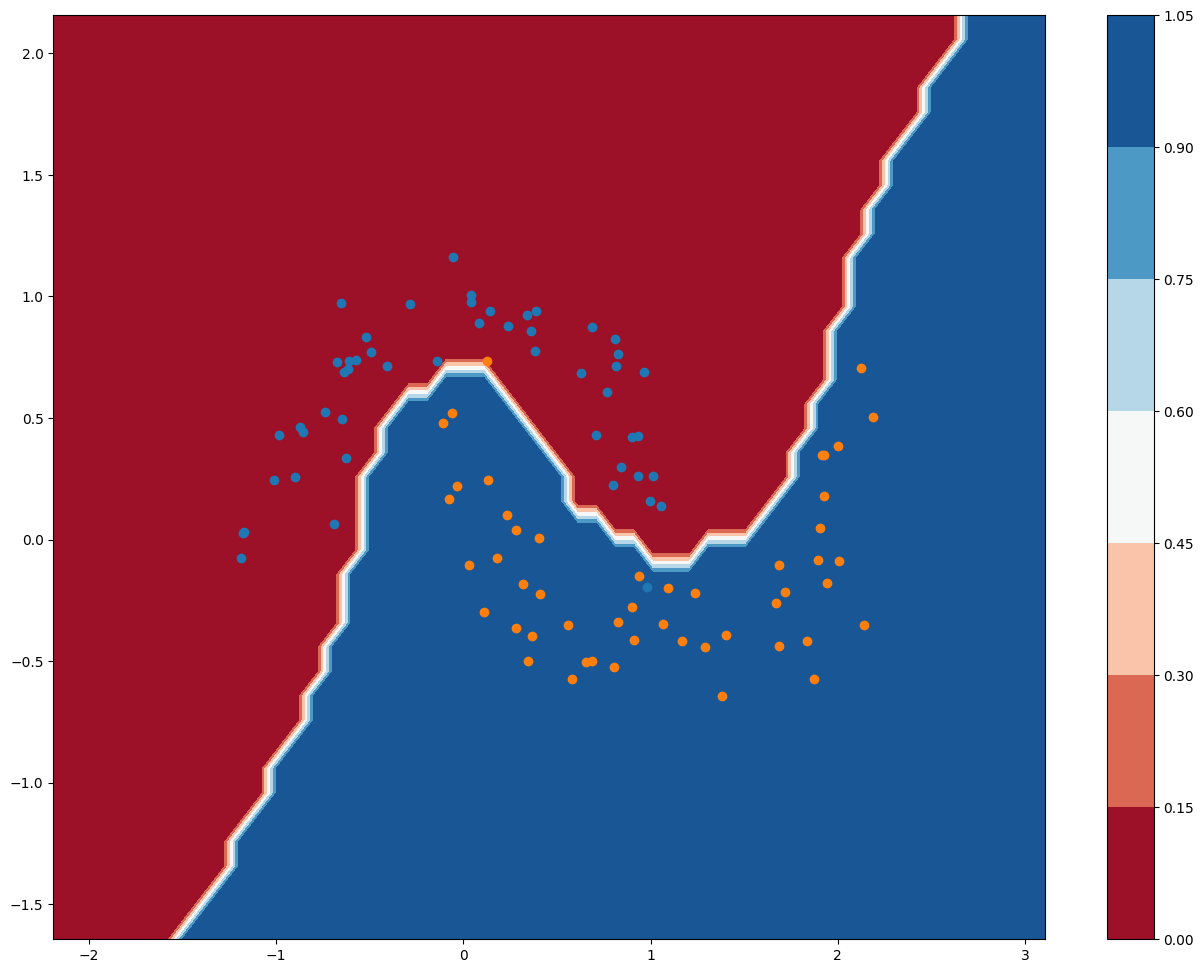

In [29]:
show_clf_boundaries(X[:,0],X[:,1],poly_kernel_svm_clf)

<ipython-input-28-16bc9550f15d>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


0.99


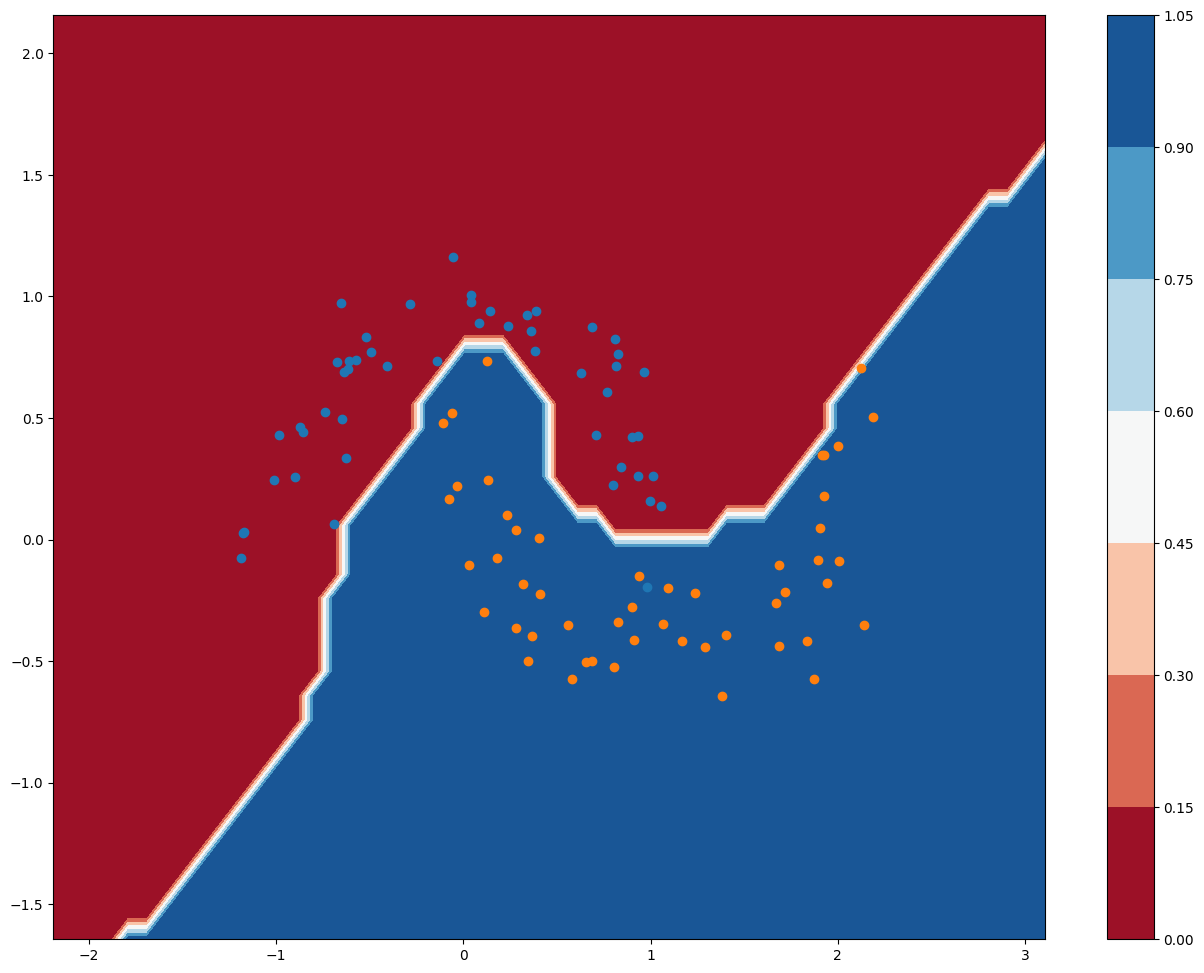

In [30]:
# we can use a higer order kernel, this will tend to overfit

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=8, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
show_clf_boundaries(X[:,0],X[:,1],poly_kernel_svm_clf)

y_pred=poly_kernel_svm_clf.predict(X)

print(sum(y_pred==y)/y.shape[0])


# Similarity based SVM

Instead of basing the SVM on the raw data, we can base the approach on a similarity metric.

We could compute the distances of each specimen from some "landmark points" in the range of the data.

In fact the easiest thing to do is measure the distance between each specimen and all the other specimens,  what may be called
the pairwise distances between specimens.   One possible distance to use is the Gaussian Radial Basis Function (RBF)

phi(X,l)= exp(-gamma * ||x-l||^2
              
              where ||x-l||^2 is a squared distance between the two specimens.   It might be an ordinary euclidean distance, or something more complex

### Gaussian RBF Kernel

The mathematics of RBF and the kernel trick allow them to be combined easily

Here's what it looks like

<ipython-input-28-16bc9550f15d>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


0.98


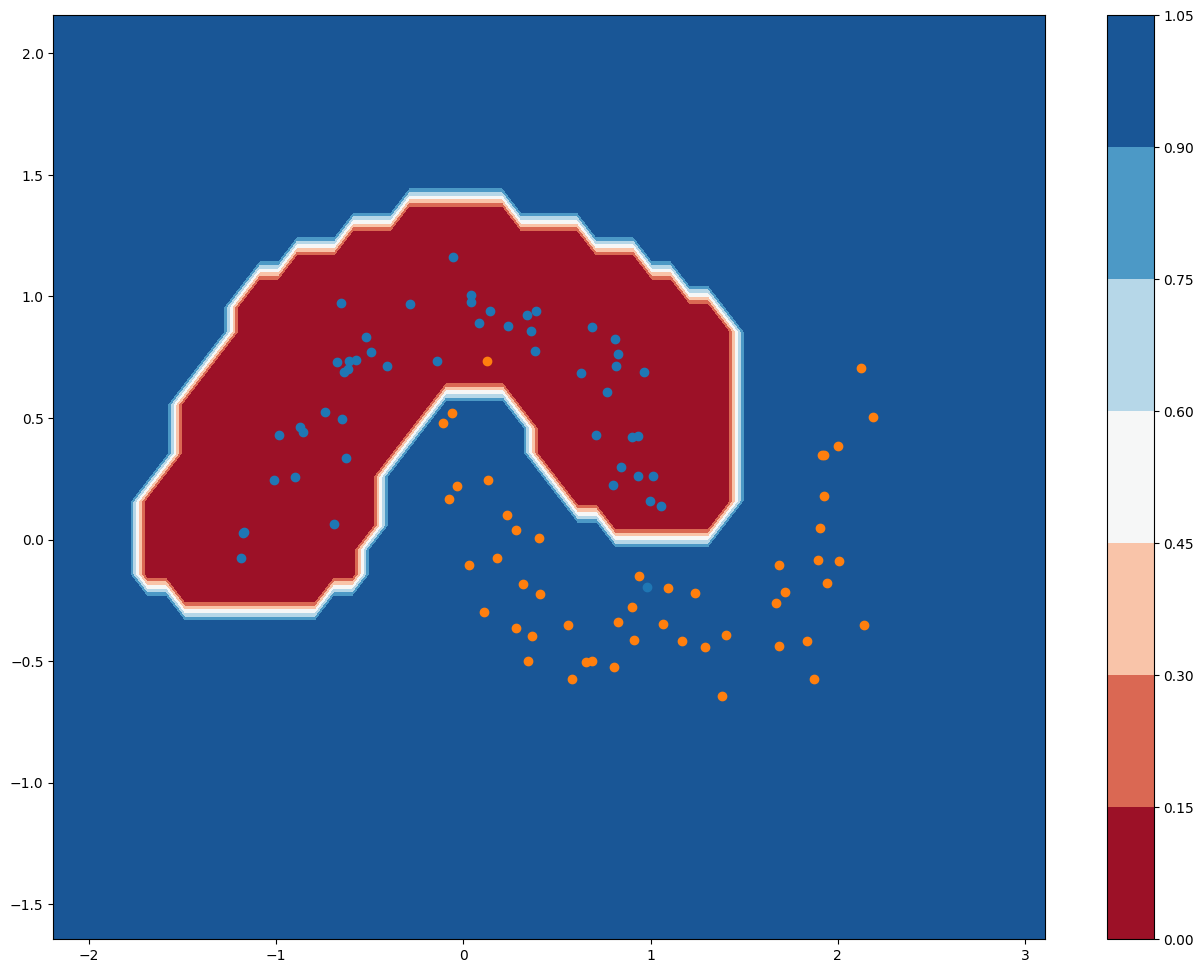

In [31]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

show_clf_boundaries(X[:,0],X[:,1],rbf_kernel_svm_clf)

y_pred=rbf_kernel_svm_clf.predict(X)

print(sum(y_pred==y)/y.shape[0])


## Question/Action

What do gamma and C control in the RBF model?

Try several different values, in the cells below, to show the impact of these changes

-Lower gamma underfit the data
-Higher gamma overfit the data

<ipython-input-28-16bc9550f15d>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


0.92


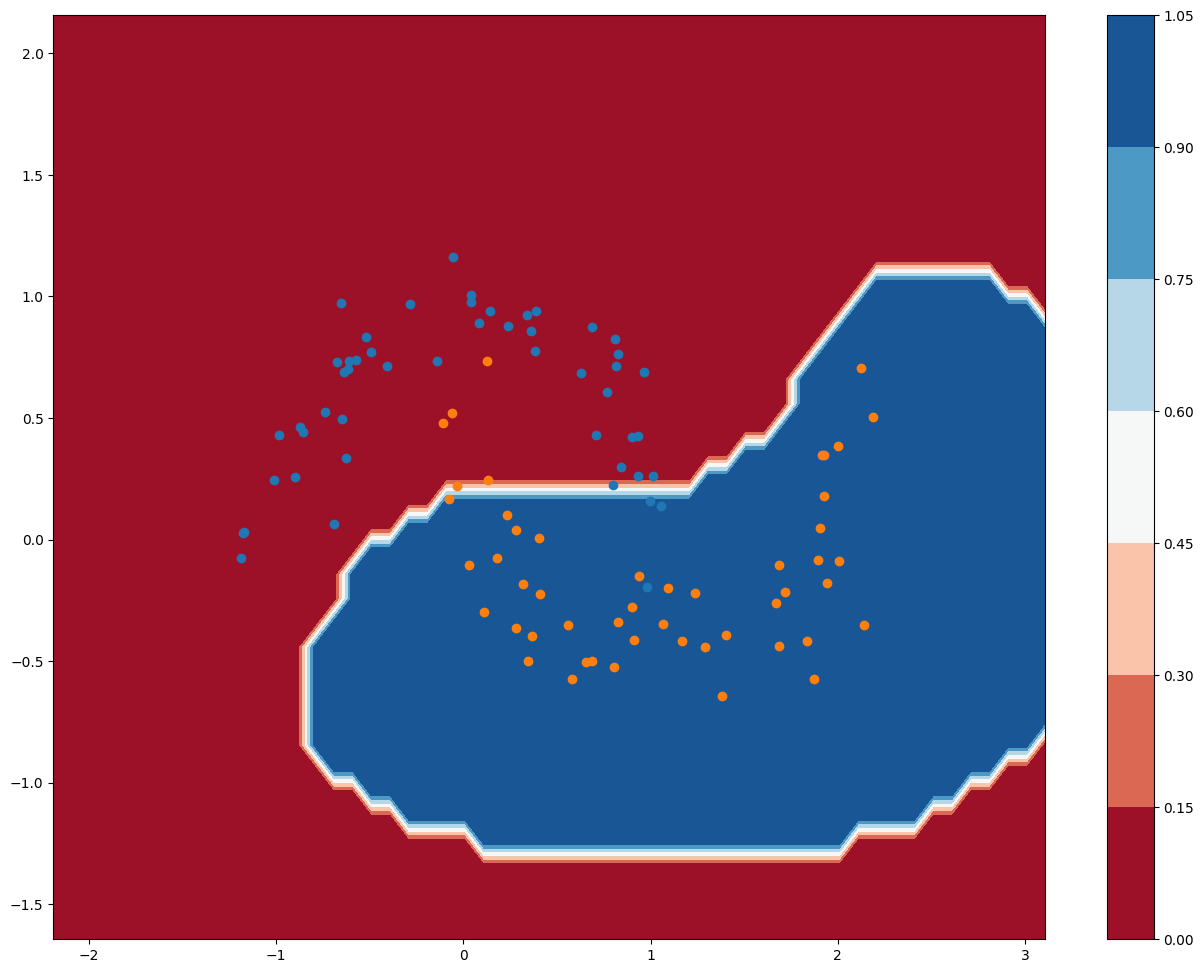

In [32]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

show_clf_boundaries(X[:,0],X[:,1],rbf_kernel_svm_clf)

y_pred=rbf_kernel_svm_clf.predict(X)

print(sum(y_pred==y)/y.shape[0])


<ipython-input-28-16bc9550f15d>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


1.0


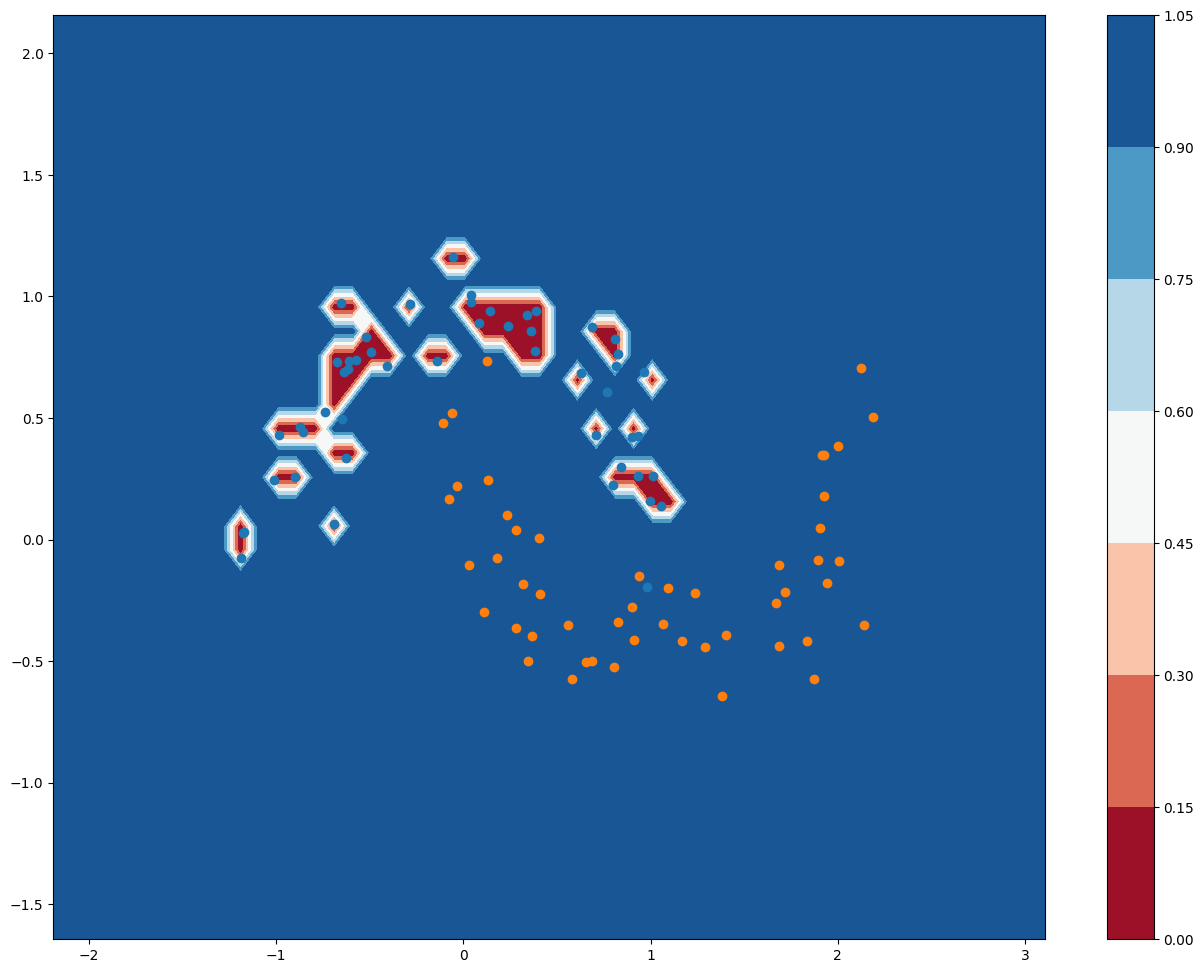

In [33]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1000, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

show_clf_boundaries(X[:,0],X[:,1],rbf_kernel_svm_clf)

y_pred=rbf_kernel_svm_clf.predict(X)

print(sum(y_pred==y)/y.shape[0])
